In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# All uploaded CSV file paths
file_paths = {
    "Casa Zimbabwe": "CasaZimbabwe_session1_group1_2025-05-05_15-18-30.csv",
    "Cloyne Court": "CloyneCourt_session1_group1_2025-05-05_18-48-51.csv",
    "Euclid Hall": "EuclidHall_session1_group1_2025-05-05_17-19-59.csv",
    "Hoyt Hall": "HoytHall_session1_group1_2025-05-07_13-12-41.csv",
    "Kidd Hall": "KiddHall_session1_group1_2025-05-05_16-08-27.csv",
    "Kingmann Hall": "KingmannHall_session1_group1_2025-05-07_13-48-47.csv",
    "Ridge House": "RidgeHouse_session1_group1_2025-05-05_17-58-10.csv",
    "Stebbins Hall": "StebbinsHall_session1_group1_2025-05-06_14-13-21.csv"
}

In [6]:
# Dictionary to store DataFrames
location_data = {}

In [7]:
# Load each file and store data
for location, path in file_paths.items():
    try:
        df = pd.read_csv(path)
        df['Time'] = pd.to_datetime(df['Time'], unit='s')
        location_data[location] = df
    except Exception as e:
        print(f"Error reading {path}: {e}")

In [9]:
# Compute mean and std for each location
summary_data = []
for location, df in location_data.items():
    mean_counts = df['counts'].mean()
    std_counts = df['counts'].std()
    mean_temp = df['Temperature'].mean()
    mean_pm25 = df['PM25'].mean()
    summary_data.append({
        'Location': location,
        'MeanCounts': mean_counts,
        'StdCounts': std_counts,
        'MeanTemp': mean_temp,
        'MeanPM25': mean_pm25
    })

summary_df = pd.DataFrame(summary_data)
summary_df_sorted = summary_df.sort_values(by='MeanCounts', ascending=False).reset_index(drop=True)

# Table 1 - Print summary table in clean text format
print("\n--- Radiation Summary by Building (Sorted by Mean Counts) ---")
print(summary_df_sorted.to_string(index=False, 
      formatters={
          'MeanCounts': '{:.2f}'.format,
          'StdCounts': '{:.2f}'.format,
          'MeanTemp': '{:.2f}'.format,
          'MeanPM25': '{:.2f}'.format
      }))


--- Radiation Summary by Building (Sorted by Mean Counts) ---
     Location MeanCounts StdCounts MeanTemp MeanPM25
    Kidd Hall      33.66      3.76    25.73     2.78
 Cloyne Court      28.07      2.51    26.56     5.96
  Euclid Hall      27.70      2.35    27.82     4.60
Stebbins Hall      26.82      2.28    23.35    14.37
Casa Zimbabwe      25.71      2.13    30.09     2.55
  Ridge House      24.46      2.64    26.23     4.83
    Hoyt Hall      23.18      2.81    20.88     8.27
Kingmann Hall      21.74      2.93    21.89    43.15


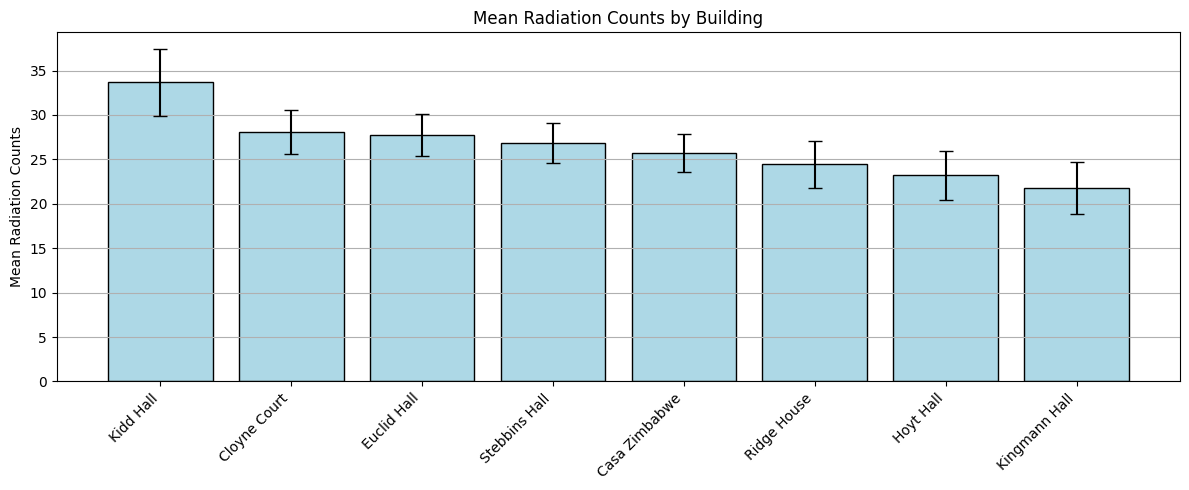

In [10]:
# Plot 1: Mean Radiation Counts by Location
plt.figure(figsize=(12, 5))
plt.bar(summary_df_sorted['Location'], summary_df_sorted['MeanCounts'], yerr=summary_df_sorted['StdCounts'],
        capsize=5, color='lightblue', edgecolor='black')
plt.ylabel("Mean Radiation Counts")
plt.title("Mean Radiation Counts by Building")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

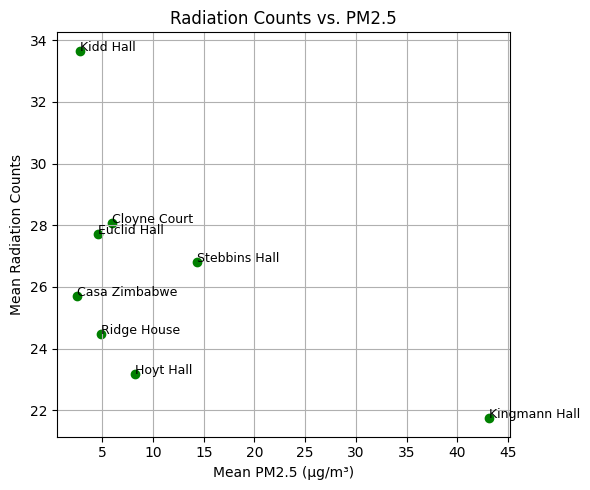

In [11]:
# Plot 2: Radiation Count vs. PM2.5
plt.figure(figsize=(6, 5))
plt.scatter(summary_df['MeanPM25'], summary_df['MeanCounts'], color='green')
for i, row in summary_df.iterrows():
    plt.text(row['MeanPM25'], row['MeanCounts'], row['Location'], fontsize=9)
plt.xlabel("Mean PM2.5 (µg/m³)")
plt.ylabel("Mean Radiation Counts")
plt.title("Radiation Counts vs. PM2.5")
plt.grid(True)
plt.tight_layout()
plt.show()

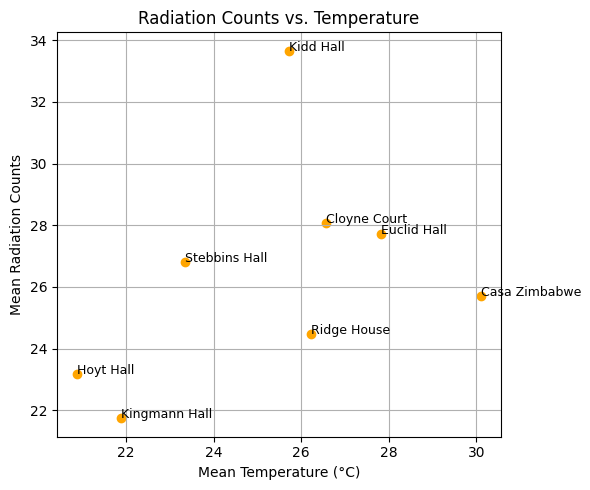

In [12]:
# Plot 3: Radiation Count vs. Temperature
plt.figure(figsize=(6, 5))
plt.scatter(summary_df['MeanTemp'], summary_df['MeanCounts'], color='orange')
for i, row in summary_df.iterrows():
    plt.text(row['MeanTemp'], row['MeanCounts'], row['Location'], fontsize=9)
plt.xlabel("Mean Temperature (°C)")
plt.ylabel("Mean Radiation Counts")
plt.title("Radiation Counts vs. Temperature")
plt.grid(True)
plt.tight_layout()
plt.show()


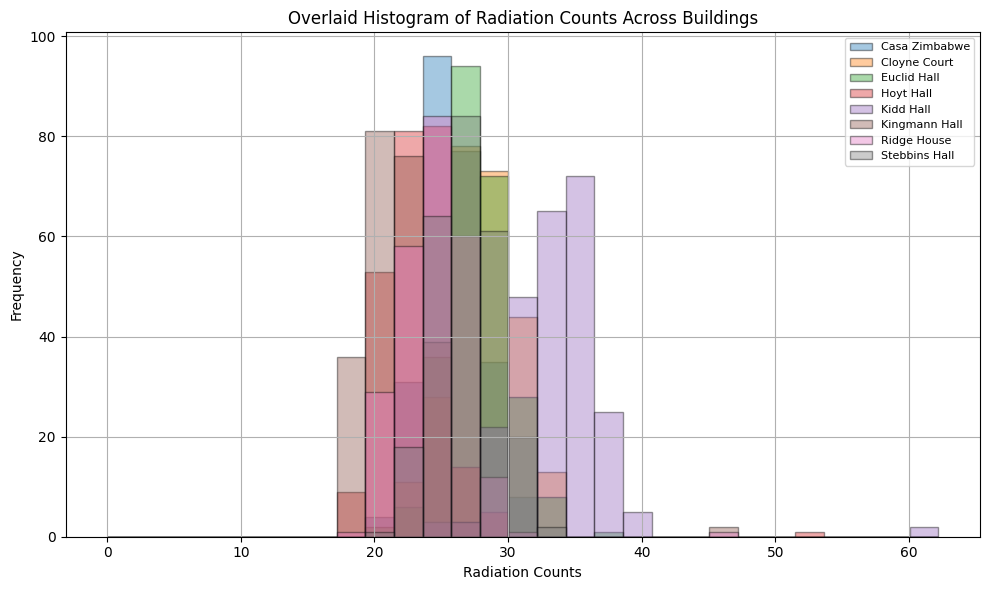

In [13]:
# Plot 4: Histogram Comparison of Radiation Counts Across Buildings 

# Plot 4 - OPTION 1: Overlaid histogram (with transparency)
plt.figure(figsize=(10, 6))
bins = np.linspace(0, max(df['counts'].max() for df in location_data.values()), 30)

for location, df in location_data.items():
    plt.hist(df['counts'], bins=bins, alpha=0.4, label=location, edgecolor='black')

plt.xlabel("Radiation Counts")
plt.ylabel("Frequency")
plt.title("Overlaid Histogram of Radiation Counts Across Buildings")
plt.legend(loc='upper right', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

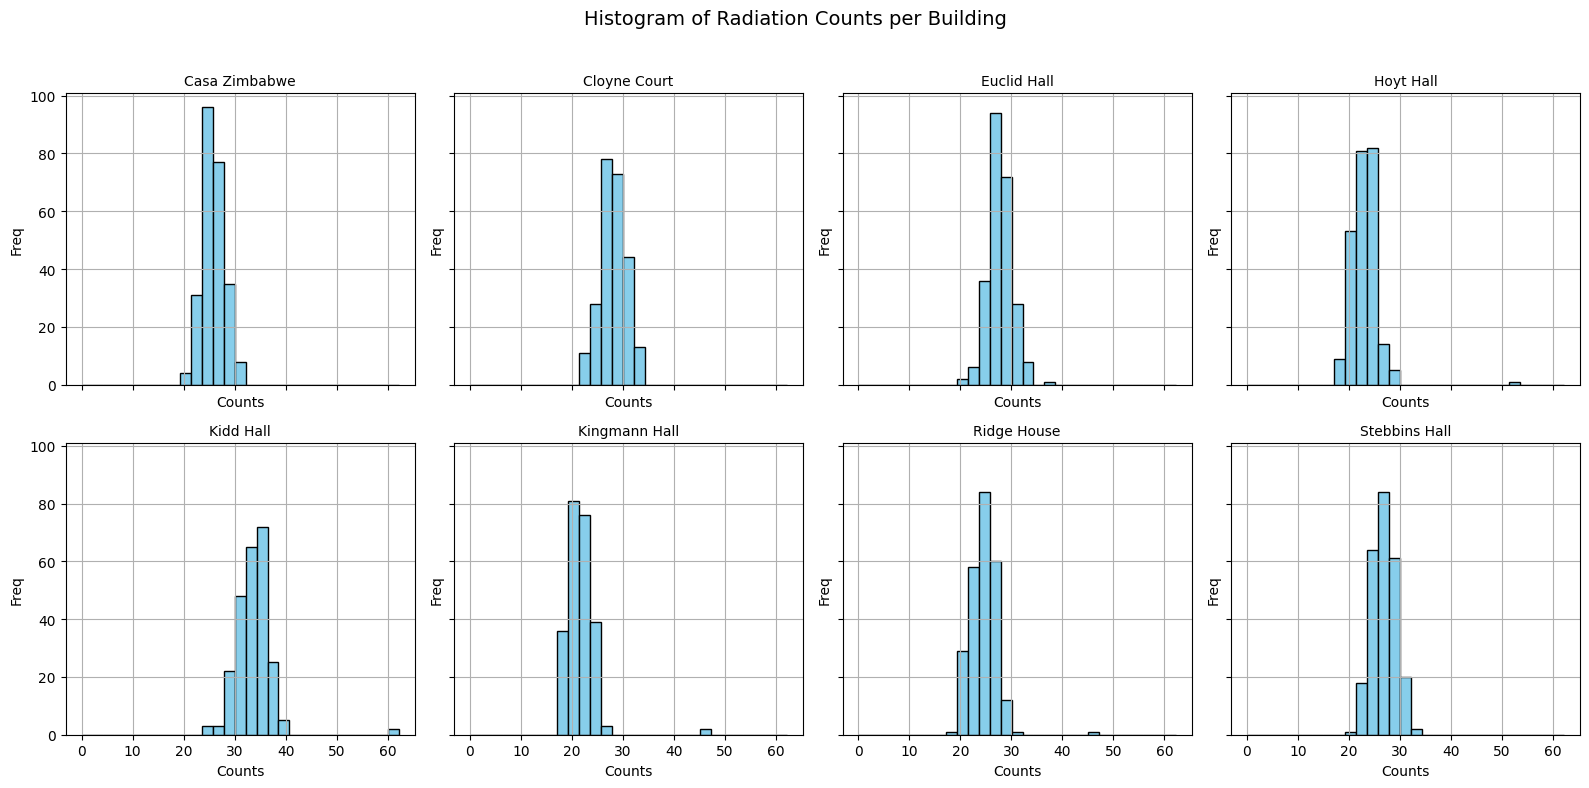

In [14]:
# Plot 4 - OPTION 2: Faceted histograms (2 rows x 4 columns)
fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharex=True, sharey=True)
axes = axes.flatten()
bins = np.linspace(0, max(df['counts'].max() for df in location_data.values()), 30)

for ax, (location, df) in zip(axes, location_data.items()):
    ax.hist(df['counts'], bins=bins, color='skyblue', edgecolor='black')
    ax.set_title(location, fontsize=10)
    ax.set_xlabel("Counts")
    ax.set_ylabel("Freq")
    ax.grid(True)

plt.suptitle("Histogram of Radiation Counts per Building", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

/var/folders/1j/t5thg2bd4hz3q2m81t8wyygm0000gn/T/ipykernel_91668/3796979413.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=labels, patch_artist=True,


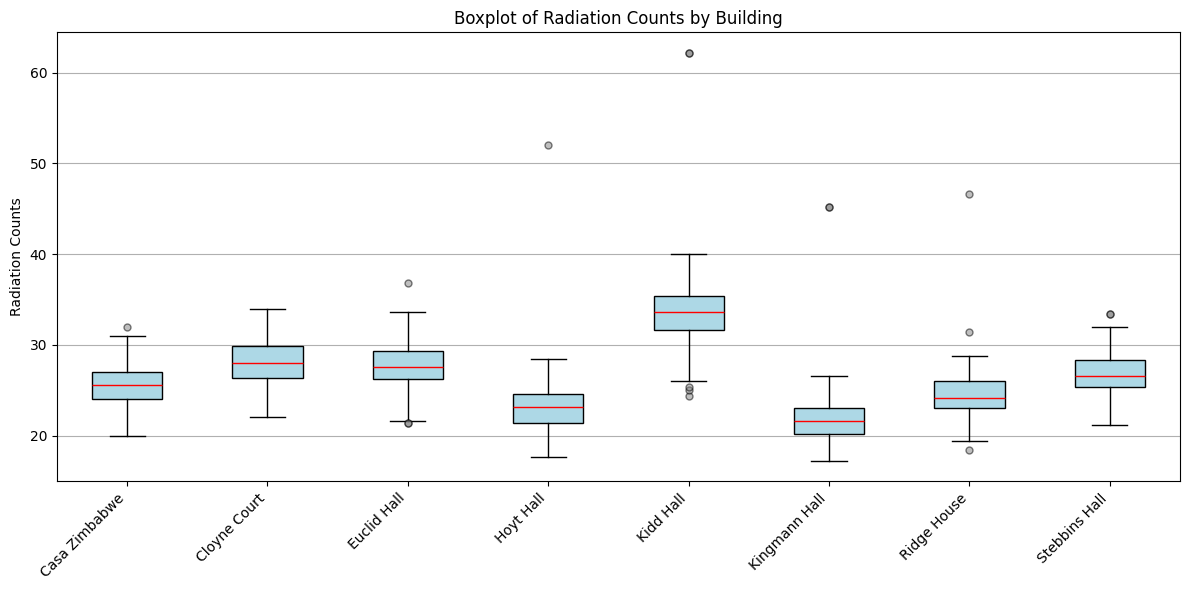

In [15]:
# Plot 5: Boxplot Comparison of Radiation Counts Across Buildings

# Prepare data in list-of-lists format for boxplot
boxplot_data = [df['counts'].values for df in location_data.values()]
labels = list(location_data.keys())

plt.figure(figsize=(12, 6))
plt.boxplot(boxplot_data, labels=labels, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(marker='o', markerfacecolor='gray', markersize=5, alpha=0.5))

plt.title("Boxplot of Radiation Counts by Building")
plt.ylabel("Radiation Counts")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


--- Coefficient of Variation (CV) for Radiation Counts ---
     Location MeanCounts StdCounts CV_Counts
Kingmann Hall      21.74      2.93     0.135
    Hoyt Hall      23.18      2.81     0.121
    Kidd Hall      33.66      3.76     0.112
  Ridge House      24.46      2.64     0.108
 Cloyne Court      28.07      2.51     0.090
Stebbins Hall      26.82      2.28     0.085
  Euclid Hall      27.70      2.35     0.085
Casa Zimbabwe      25.71      2.13     0.083


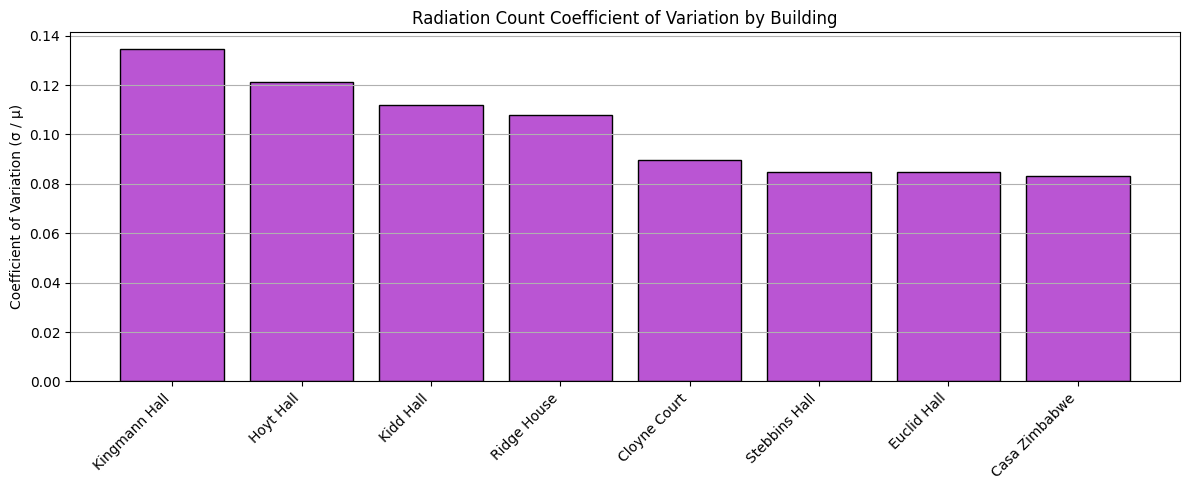

In [16]:
# Table 2 - Coefficient of Variation (CV) for Radiation Counts

# Calculate CV = std / mean for each building
summary_df['CV_Counts'] = summary_df['StdCounts'] / summary_df['MeanCounts']

# Sort by CV for better readability in the plot
summary_df_cv_sorted = summary_df.sort_values(by='CV_Counts', ascending=False)

# Print CV values
print("\n--- Coefficient of Variation (CV) for Radiation Counts ---")
print(summary_df_cv_sorted[['Location', 'MeanCounts', 'StdCounts', 'CV_Counts']].to_string(
    index=False,
    formatters={
        'MeanCounts': '{:.2f}'.format,
        'StdCounts': '{:.2f}'.format,
        'CV_Counts': '{:.3f}'.format
    }
))

# Plot 6 - Bar chart of CV
plt.figure(figsize=(12, 5))
plt.bar(summary_df_cv_sorted['Location'], summary_df_cv_sorted['CV_Counts'],
        color='mediumorchid', edgecolor='black')
plt.ylabel("Coefficient of Variation (σ / μ)")
plt.title("Radiation Count Coefficient of Variation by Building")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [18]:
from scipy.stats import f_oneway, kruskal

# Table 3 - Statistical Significance Tests on Radiation Counts

# Collect radiation counts grouped by location
radiation_groups = [df['counts'].values for df in location_data.values()]
locations = list(location_data.keys())

# Perform One-Way ANOVA (parametric test)
anova_stat, anova_p = f_oneway(*radiation_groups)

# Perform Kruskal-Wallis Test (non-parametric)
kruskal_stat, kruskal_p = kruskal(*radiation_groups)

# Store and convert results to native Python types
anova_result = {
    "Test": "One-Way ANOVA",
    "F-Statistic": float(anova_stat),
    "p-Value": float(anova_p),
    "Significant": bool(anova_p < 0.05)
}

kruskal_result = {
    "Test": "Kruskal-Wallis",
    "H-Statistic": float(kruskal_stat),
    "p-Value": float(kruskal_p),
    "Significant": bool(kruskal_p < 0.05)
}

# Print results in a readable format
print("\n--- Statistical Significance Tests for Radiation Counts ---")
print(f"{anova_result['Test']}:")
print(f"  F-Statistic = {anova_result['F-Statistic']:.2f}")
print(f"  p-Value     = {anova_result['p-Value']:.4e}")
print(f"  Significant = {anova_result['Significant']}\n")

print(f"{kruskal_result['Test']}:")
print(f"  H-Statistic = {kruskal_result['H-Statistic']:.2f}")
print(f"  p-Value     = {kruskal_result['p-Value']:.4e}")
print(f"  Significant = {kruskal_result['Significant']}")




--- Statistical Significance Tests for Radiation Counts ---
One-Way ANOVA:
  F-Statistic = 441.93
  p-Value     = 0.0000e+00
  Significant = True

Kruskal-Wallis:
  H-Statistic = 1248.80
  p-Value     = 1.9735e-265
  Significant = True
